# Aufgabe 1
Schreiben sie einen Generator (Funktion mit "yield"), der aufsteigend ungerade Zahlen ab 20 ausgibt. Rufen sie diesen Generator in einer Schleife auf und speichern sie die ersten 10 Werte in einer Liste. Geben sie davon die Werte 4-7 aus.

In [5]:
def odd_numbers_from_20():
    x = 20
    while True:
        if x % 2 != 0:
            yield x
        x += 1

generator = odd_numbers_from_20()
result = [next(generator) for x in range(10)]
print(result[4:7])

[29, 31, 33]


# Aufgabe 2
Denken sie sich ihre Lottozahlen für "6 aus 45" aus und speichern sie diese als Liste.
Versuchen sie nun mittels eines Zufallsprozesses auch Lottozahlen zu ermitteln und zählen sie die Versuche, bis ihre Zahlen erreicht werden.

In [69]:
import random

lottery_numbers = range(45)
winning_numbers = sorted(random.sample(lottery_numbers, 6))

tries = 0
while True:
    guess = range(45)
    guessed_numbers = random.sample(guess, 6)

    if sorted(guessed_numbers) == winning_numbers:
        print(f"You won the lottery")
        break

    tries += 1    

print(f"You needed {tries} number of tries")



You won the lottery
You needed 12980731 number of tries


# Aufgabe: Mittlere Anzahl Freunde von Freunden
Ermitteln sie analog zum Beispiel die mittlere Anzahl der Freunde von Freunden im Netzwerk von DataSciencester.

In [92]:
from collections import Counter

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


friendships = {user["id"]: [] for user in users}

# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    friendships[i].append(j)  # Add j as a friend of user i
    friendships[j].append(i)  # Add i as a friend of user j


def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

def friends_of_friends(user):
    user_id = user["id"]
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]     # For each of my friends,
        for foaf_id in friendships[friend_id]     # find their friends
        if foaf_id != user_id                     # who aren't me
        and foaf_id not in friendships[user_id]   # and aren't my friends.
    )

def number_of_foaf(user):
    """How many friends of a friend th _user_ have?"""
    return len(friends_of_friends(user))




total_connections_foaf = sum(number_of_foaf(user)
                        for user in users)


num_users = len(users)
avg_connections_foaf = total_connections_foaf / num_users

print(avg_connections_foaf)

2.0


# Zusatzaufgabe: Keine gemeinsamen Interessen
Ermitteln sie, ob es im Netzwerk von DataSciencester Nutzer gibt, die keine gemeinsamen Interessen haben.

In [6]:
from collections import defaultdict, Counter

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" },
    { "id": 10, "name": "Yannick" },
]

interests = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data"), (10, "Game Development")
]

# Keys are user_ids, values are lists of interests for that user_id.
interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

# Keys are interests, values are lists of user_ids with that interest
user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)


def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user["id"]]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user["id"]
    )
def is_user_with_no_common_interests(user):
    return most_common_interests_with(user) == Counter()
       
for user in users:
    if is_user_with_no_common_interests(user):
        user_id = user["id"]
        print(f"User with id {user_id} does not have any interests in common with other users")

User with id 10 does not have any interests in common with other users


# Gruppenübung zur Datenanalyse 1

Im Moodle ist der bekannte Datensatz "Iris" hinterlegt. Sichten sie den Datensatz und überlegen sie, was man damit anfangen könnte.

Fragen: Wie ist er aufgebaut? Welche Arten von Daten(werten) liegen vor? Was könnte man mit dem Datensatz anfangen?

Lesen sie den Datensatz in Python ein und bereiten sie ihn auf, so dass statistische Analysen und/oder Visualisierungen wie in den Beispielen aus dem Kurs möglich sind. Planen sie zuerst ihr Vorgehen, bevor sie programmieren.


`ACHTUNG: In diesem ersten Teil sollen keine Python-Bibliotheken wie numpy oder pandas zum Einsatz kommen, sondern in etwa so programmiert werden wie in den Beispielen in der Vorlesung (DataSciencester). Matplotlib darf verwendet werden, falls sie eine Visualisierung erstellen wollen.`

In [13]:
import csv

def read_iris_data_set():
    with open('./data/iris.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\t')
        line_count = 0
        iris_dataset = []
        data_start_index = 3
        keys = []
        for row in csv_reader:
            if line_count == 0:
                keys = row
            if line_count >= data_start_index:
                iris_obj = {}
                for (index, key) in enumerate(keys):
                    is_float = index <= 3
                    if is_float:
                        iris_obj[key] = float(row[index])
                    else:
                        iris_obj[key] = row[index]
                iris_dataset.append(iris_obj)
            line_count += 1
        return iris_dataset


def calculate_statistic_values(iris_data, iris_type):

    data_for_type = [x for x in iris_data if x["iris"] == iris_type]

    min_sepal_length = min([data["sepal length"] for data in data_for_type])
    max_sepal_length = max([data["sepal length"] for data in data_for_type])
    average_sepal_length = sum([data["sepal length"] for data in data_for_type]) / len(data_for_type)

    header_desc = f"Statistic Values for Iris Type: {iris_type}"
    print(len(header_desc) * "#")
    print(header_desc)
    print(len(header_desc) * "#")
    print(f"Min Sepal Length: {min_sepal_length}")
    print(f"Max Sepal Length: {max_sepal_length}")
    print(f"Average Sepal Lenght: {average_sepal_length}")


iris_data = read_iris_data_set()
iris_types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

for iris_type in iris_types:
    calculate_statistic_values(iris_data, iris_type)



###########################################
Statistic Values for Iris Type: Iris-setosa
###########################################
Min Sepal Length: 4.3
Max Sepal Length: 5.8
Average Sepal Lenght: 5.005999999999999
###############################################
Statistic Values for Iris Type: Iris-versicolor
###############################################
Min Sepal Length: 4.9
Max Sepal Length: 7.0
Average Sepal Lenght: 5.936
##############################################
Statistic Values for Iris Type: Iris-virginica
##############################################
Min Sepal Length: 4.9
Max Sepal Length: 7.9
Average Sepal Lenght: 6.587999999999998


# Weiterführung der Gruppenübung
Zusatzaufgaben:

* Berechnen sie die Durchschnittswerte der Blattmasse je Art und geben sie diese übersichtlich aus.
* Berechnen sie auch die Varianz der Werte. Wo sind am ehesten Überschneidungen zu erwarten? Welche Masse eignen sich gut zur Unterscheidung?

In [24]:
import csv

def read_iris_data_set():
    with open('./data/iris.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='\t')
        line_count = 0
        iris_dataset = []
        data_start_index = 3
        keys = []
        for row in csv_reader:
            if line_count == 0:
                keys = row
            if line_count >= data_start_index:
                iris_obj = {}
                for (index, key) in enumerate(keys):
                    is_float = index <= 3
                    if is_float:
                        iris_obj[key] = float(row[index])
                    else:
                        iris_obj[key] = row[index]
                iris_dataset.append(iris_obj)
            line_count += 1
        return iris_dataset

def calculate_statistic_values(data_for_type, property):
    """
    Calculates statistic values such as min, max, average and variance for a given property e.g 'sepal length' etc.
    """
    min_value = min([data[property] for data in data_for_type])
    max_value = max([data[property] for data in data_for_type])
    average_value = sum([data[property] for data in data_for_type]) / len(data_for_type)
    variance_value = sum([(data[property] - average_value) ** 2 for data in data_for_type]) / len(data_for_type)

    return(min_value, max_value, average_value, variance_value)


def print_statistic_values(iris_data, iris_type):

    data_for_type = [x for x in iris_data if x["iris"] == iris_type]
    
    min_sepal_length, max_sepal_length, average_sepal_length, variance_sepal_length = calculate_statistic_values(data_for_type, "sepal length")

    min_sepal_width, max_sepal_width, average_sepal_width, variance_sepal_width = calculate_statistic_values(data_for_type, "sepal width")

    min_petal_length, max_petal_length, average_petal_length, variance_petal_length = calculate_statistic_values(data_for_type, "petal length")

    min_petal_width, max_petal_width, average_petal_width, variance_petal_width = calculate_statistic_values(data_for_type, "petal width")


    header_desc = f"Statistic Values for Iris Type: {iris_type}"
    print(len(header_desc) * "#")
    print(header_desc)
    print(len(header_desc) * "#")
    print(f"Min Sepal Length: {min_sepal_length}")
    print(f"Max Sepal Length: {max_sepal_length}")
    print(f"Average Sepal Lenght: {average_sepal_length}")
    print(f"Variance Sepal Lenght: {variance_sepal_length}")

    print(f"Min Sepal Width: {min_sepal_width}")
    print(f"Max Sepal Width: {max_sepal_width}")
    print(f"Average Sepal Width: {average_sepal_width}")
    print(f"Variance Sepal Width: {variance_sepal_width}")

    print(f"Min Petal Length: {min_petal_length}")
    print(f"Max Petal Length: {max_petal_length}")
    print(f"Average Petal Lenght: {average_petal_length}")
    print(f"Variance Petal Lenght: {variance_petal_length}")

    print(f"Min Petal Width: {min_petal_width}")
    print(f"Max Petal Width: {max_petal_width}")
    print(f"Average Petal Width: {average_petal_width}")
    print(f"Variance Petal Width: {variance_petal_width}")

iris_data = read_iris_data_set()
iris_types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

for iris_type in iris_types:
    print_statistic_values(iris_data, iris_type)
    # Add a new line for better readability
    print()



###########################################
Statistic Values for Iris Type: Iris-setosa
###########################################
Min Sepal Length: 4.3
Max Sepal Length: 5.8
Average Sepal Lenght: 5.005999999999999
Variance Sepal Lenght: 0.12176399999999993
Min Sepal Width: 2.3
Max Sepal Width: 4.4
Average Sepal Width: 3.4180000000000006
Variance Sepal Width: 0.142276
Min Petal Length: 1.0
Max Petal Length: 1.9
Average Petal Lenght: 1.464
Variance Petal Lenght: 0.02950400000000001
Min Petal Width: 0.1
Max Petal Width: 0.6
Average Petal Width: 0.2439999999999999
Variance Petal Width: 0.011263999999999996

###############################################
Statistic Values for Iris Type: Iris-versicolor
###############################################
Min Sepal Length: 4.9
Max Sepal Length: 7.0
Average Sepal Lenght: 5.936
Variance Sepal Lenght: 0.2611040000000001
Min Sepal Width: 2.0
Max Sepal Width: 3.4
Average Sepal Width: 2.7700000000000005
Variance Sepal Width: 0.09650000000000002
Min P

# Gruppenübung zur Datenanalyse 2
Im Gegensatz zum ersten Übungsteil soll nun die Python-Bibliothek "pandas" zum Einsatz kommen. Lesen sie den Iris-Datensatz mit pandas ein und erstellen sie auch hier einfache Statistiken - wie vorher in "pure Python". 

In [76]:
import pandas as pd

def print_iris_statistics(iris_df, iris_type):
    iris_type_df = iris_df[iris_df["iris"] == iris_type]

    header_desc = f"Statistic Values for Iris Type: {iris_type}"
    print(len(header_desc) * "#")
    print(header_desc)
    print(len(header_desc) * "#")
    
    print("Petal Length")
    print(iris_type_df["petal length"].describe())
    print()

    print("Petal Width")
    print(iris_type_df["petal width"].describe())
    print()
    
    print("Sepal Length")
    print(iris_type_df["sepal length"].describe())
    print()

    print("Sepal Width")
    print(iris_type_df["sepal width"].describe())
    print()

def get_statistic_values_for_type(iris_df, iris_type, property):
    iris_type_df = iris_df[iris_df["iris"] == iris_type]

    min_value = iris_type_df[property].min()
    mean_value = iris_type_df[property].mean()
    max_value = iris_type_df[property].max()
    variance_value = iris_type_df[property].var()
    

    return(min_value, max_value, mean_value, variance_value)

iris_df = pd.read_csv("./data/iris.csv", sep="\t", skiprows=[1, 2])
    
iris_types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

for iris_type in iris_types:
    print_iris_statistics(iris_df, iris_type)
    # Add a new line for better readability
    print()

# values = get_statistic_values_for_type(iris_df, "Iris-setosa", "sepal length")
# print(values)



###########################################
Statistic Values for Iris Type: Iris-setosa
###########################################
Petal Length
count    50.000000
mean      1.464000
std       0.173511
min       1.000000
25%       1.400000
50%       1.500000
75%       1.575000
max       1.900000
Name: petal length, dtype: float64

Petal Width
count    50.00000
mean      0.24400
std       0.10721
min       0.10000
25%       0.20000
50%       0.20000
75%       0.30000
max       0.60000
Name: petal width, dtype: float64

Sepal Length
count    50.00000
mean      5.00600
std       0.35249
min       4.30000
25%       4.80000
50%       5.00000
75%       5.20000
max       5.80000
Name: sepal length, dtype: float64

Sepal Width
count    50.000000
mean      3.418000
std       0.381024
min       2.300000
25%       3.125000
50%       3.400000
75%       3.675000
max       4.400000
Name: sepal width, dtype: float64


###############################################
Statistic Values for Iris Type: Iri

# Aufgabe VIS-1 (zum Warmwerden)
Kopieren sie die Beispiel-Visualisierung zum Bruttosozialprodukt (GDP) und erzeugen sie mittels plt.show() die Graphik.

Sobald das funktioniert, erweitern sie die graphische Darstellung um (frei erfundene) Werte für 2020 und lassen sich diese Graphik ebenfalls anzeigen.

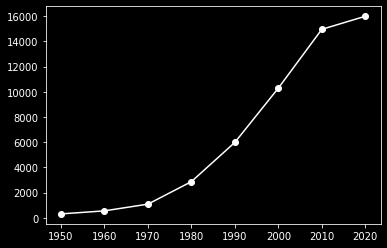

In [86]:
from matplotlib import pyplot as plt
plt.style.use('dark_background')

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3, 16000]

# create a line chart, years on x-axis, gdp on y-axis
plt.plot(years, gdp, color='white', marker='o', linestyle='solid')

plt.show()

# Aufgabe VIS-2: Balkendiagramm
Entwickeln sie das Beispiel zu Balkendiagrammen weiter:

* Fügen sie einen weiteren Film hinzu
* Entfernen sie die direkte Benennung der Balken (xticks)
* Fügen sie stattdessen eine Legende als x-Achsenbeschriftung hinzu (0 - Annie Hall, ...)

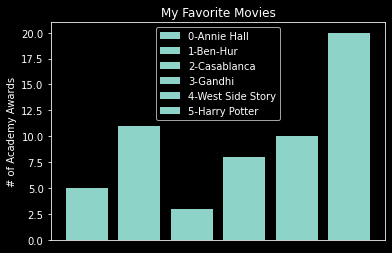

In [10]:
from matplotlib import pyplot as plt
plt.style.use('dark_background')

movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story", "Harry Potter"]
num_oscars = [5, 11, 3, 8, 10, 20]

# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars, label=[f"{index}-{name}" for index, name in enumerate(movies)])


plt.title("My Favorite Movies")     # add a title
plt.ylabel("# of Academy Awards")   # label the y-axis

plt.xticks([])

plt.legend(loc=9)

plt.show()

# Zusatzaufgabe VIS-2.1
Visualisieren sie statt der Filme die Anzahl der Freunde pro Nutzer aus dem DataSciencester-Beispiel

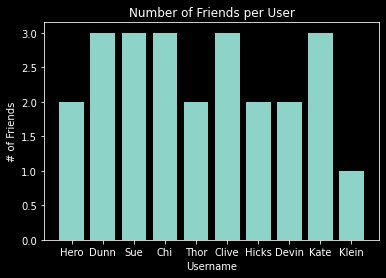

In [20]:
from matplotlib import pyplot as plt

users = [
    { "id": 0, "name": "Hero" },
    { "id": 1, "name": "Dunn" },
    { "id": 2, "name": "Sue" },
    { "id": 3, "name": "Chi" },
    { "id": 4, "name": "Thor" },
    { "id": 5, "name": "Clive" },
    { "id": 6, "name": "Hicks" },
    { "id": 7, "name": "Devin" },
    { "id": 8, "name": "Kate" },
    { "id": 9, "name": "Klein" }
]

friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]


friendships = {user["id"]: [] for user in users}

# And loop over the friendship pairs to populate it:
for i, j in friendship_pairs:
    friendships[i].append(j)  # Add j as a friend of user i
    friendships[j].append(i)  # Add i as a friend of user j


def number_of_friends(user):
    """How many friends does _user_ have?"""
    user_id = user["id"]
    friend_ids = friendships[user_id]
    return len(friend_ids)

number_of_friends_per_user = [number_of_friends(user) for user in users]

plt.style.use('dark_background')

plt.bar(range(len(users)), number_of_friends_per_user)


plt.title("Number of Friends per User")     # add a title
plt.ylabel("# of Friends")   # label the y-axis
plt.xlabel("Username")   # label the x-axis

plt.xticks(range(len(users)), [f"{user['name']}" for user in users])

plt.show()

# Aufgabe VIS-3: Histogramm
Erweitern sie den Datenbestand (grades) so, dass für jeden Wert (jedes Dezil) auch Daten vorhanden sind und lassen die die neue Graphik anzeigen.

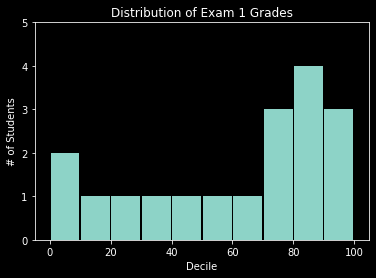

In [46]:
from matplotlib import pyplot as plt
plt.style.use('dark_background')

num_bins = 10
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0, 22, 45, 11, 30, 50]

plt.hist(grades, num_bins, rwidth=0.95)    # Should have 95% of max width
plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

# Aufgabe VIS-4: Histogramm
Verändern sie die Histogramm-Graphik so, dass statt Dezilen Quintile angezeigt werden. Es soll also nur noch 5 Stufen geben: 0-19, 20-39 ...

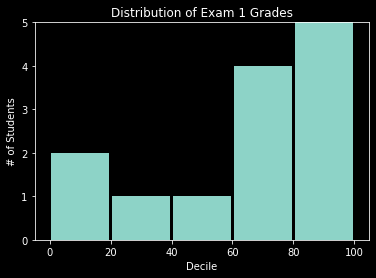

In [47]:
from matplotlib import pyplot as plt
plt.style.use('dark_background')

grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0, 22, 45]

num_bins = 5
plt.hist(grades, num_bins, rwidth=0.95) #rwidht Spaltenbreite in %
plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                           # y-axis from 0 to 5

plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

# Zusatzaufgabe VIS-4.1
Verwenden sie statt des Histogramms (Balkendiagramms) das zuerst verwendete Liniendiagramm.
Was müssen sie tun, um zu einer (halbwegs) brauchbaren Darstellung zu kommen? (Kommentar im Code)

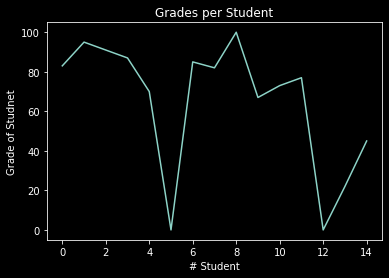

In [57]:
from matplotlib import pyplot as plt
plt.style.use('dark_background')
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0, 22, 45] # Grades go from 0 (dear lord) to 100
students = [index for index, grade in enumerate(grades)]

plt.plot(students, grades)
plt.xlabel("# Student")
plt.ylabel("Grade of Studnet")
plt.title("Grades per Student")
plt.show()

# Gruppenübung zur Daten-Visualisierung
Wir nehmen uns noch einmal den Iris-Datensatz vor. Wir wollen mittels Scatterplot(s) Hinweise erlangen, anhand welcher Merkmale sich die Iris-Arten unterscheiden lassen. Überlegen sie sich in der Gruppe, welche Möglichkeiten es gibt, mittels einfacher (zwei-dimensionaler - wie wir sie gerade kennengelernt haben) Scatterplots ausgewählte Merkmale der Pflanzen vergleichen zu können.

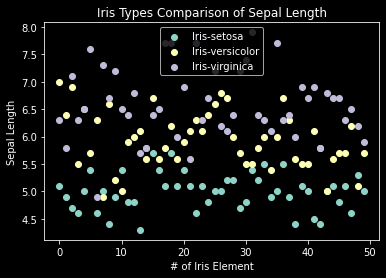

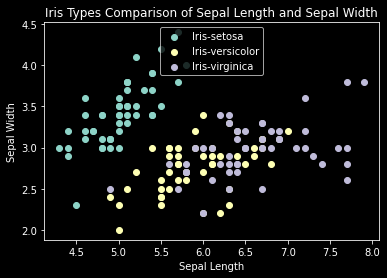

In [30]:
import pandas as pd
from matplotlib import pyplot as plt

def get_iris_type_df(iris_df, iris_type, iris_property):
    iris_type_df = iris_df[iris_df["iris"] == iris_type]
    return iris_type_df[iris_property]


plt.style.use('dark_background')
iris_df = pd.read_csv("./data/iris.csv", sep="\t", skiprows=[1, 2])
    
iris_types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

for iris_type in iris_types:
    iris_type_sepal_length_df = get_iris_type_df(iris_df, iris_type, "sepal length")
    x = [index for index in range(iris_type_sepal_length_df.count())]
    y = iris_type_sepal_length_df.tolist()
    plt.scatter(x, y, label=iris_type)

plt.legend(loc=9)
plt.title("Iris Types Comparison of Sepal Length")
plt.xlabel("# of Iris Element")
plt.ylabel("Sepal Length")

plt.show()


for iris_type in iris_types:
    iris_type_sepal_length_df = get_iris_type_df(iris_df, iris_type, "sepal length")
    iris_type_sepal_width_df = get_iris_type_df(iris_df, iris_type, "sepal width")
    x = iris_type_sepal_length_df.tolist()
    y = iris_type_sepal_width_df.tolist()
    plt.scatter(x, y, label=iris_type)

plt.legend(loc=9)
plt.title("Iris Types Comparison of Sepal Length and Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

plt.show()

# Gruppenübung zur Daten-Visualisierung (mittels DataFrame)
Erzeugen sie nun Graphiken direkt aus den DataFrame-Objekten zu den Iris-Daten. Sie können auf der Übung aus der vorangegangenen Lektion aufbauen. Speichern sie sich die Bilder, so dass sie sie im Webex anzeigen können. 

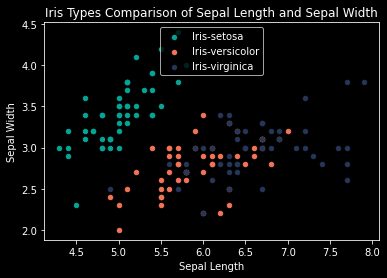

In [37]:
import pandas as pd
from matplotlib import pyplot as plt

def get_iris_type_df(iris_df, iris_type):
    iris_type_df = iris_df[iris_df["iris"] == iris_type]
    return iris_type_df


plt.style.use('dark_background')
iris_df = pd.read_csv("./data/iris.csv", sep="\t", skiprows=[1, 2])
    
iris_types = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
colors = ["#03A696", "#F27457", "#253659"]

# Use global common axis
ax = plt.gca()
for color, iris_type in zip(colors, iris_types):
    iris_type_sepal_length_sepal_width_df = get_iris_type_df(iris_df, iris_type)[["sepal length", "sepal width"]]
    iris_type_sepal_length_sepal_width_df.plot.scatter(x="sepal length", y="sepal width", label=iris_type, ax=ax, color=color)

plt.legend(loc=9)
plt.title("Iris Types Comparison of Sepal Length and Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

plt.show()

# Aufgabe: Dateien einlesen mit pandas
Wir haben drei unterschiedliche Arten kennengelernt, Dateien einzulesen (CSV, Text, JSON).
Zur Übung lesen sie die dabei verwendeten Dateien auch mittels pandas ein. 

In [65]:
import pandas as pd
country_df = pd.read_csv("data/country_data.csv")
country_df

deu_mixed_typical_df = pd.read_csv("data/deu_mixed-typical_2011_300K-sources.txt", sep="\t")
deu_mixed_typical_df

movies_df = pd.read_json("data/movie.json", typ=dict)
movies_df

zen_of_python = pd.read_table("data/zen_of_python.txt")
zen_of_python

unicode_df = pd.read_table("data/unicode-bsp.txt", encoding="utf-8")
unicode_df


,"Original by Markus Kuhn, adapted for HTML by Martin Dürst."
0,UTF-8 encoded sample plain-text file
1,‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
2,Markus Kuhn [ˈmaʳkʊs kuːn] <mkuhn@acm.org> — 1...
3,The ASCII compatible UTF-8 encoding of ISO 106...
4,plain-text files is defined in RFC 2279 and in...
...,...
148,║│╲ ╱│║ │║ ║│ ││ │ ││ │║ ┃ ║│ ┃│ ╿ │┃ ...
149,╠╡ ╳ ╞╣ ├╢ ╟┤ ├┼─┼─┼┤ ├╫─╂─╫┤ ┣┿╾┼╼┿┫ ...
150,║│╱ ╲│║ │║ ║│ ││ │ ││ │║ ┃ ║│ ┃│ ╽ │┃ ...
151,║└─╥─┘║ │╚═╤═╝│ │╘═╪═╛│ │╙─╀─╜│ ┃└─╂─┘┃ ...


# Aufgabe: Datei einlesen und statistisch auswerten
Im vorigen Abschnitt zum Einlesen von Dateien ist auch die Datei "deu_mixed-typical_2011_300K-sources.txt" verfügbar. Falls noch nicht geschehen, laden sie diese Datei herunter und speichern sie sie lokal.

Hintergrund: Die Datei enthält Infos zu einem Zeitungskorpus, den wir später im Modul NLP verwenden werden. Hier ist aber nicht der Korpus selbst gespeichert, sondern Infos zu der Herkunft der Bestandteile.

Führen sie die Schritte zum Einlesen von Dateien durch und berechnen sie statistische Masse zum Korpus. Überlegen sie sich, welche Fragestellungen hier relevant sein können und versuchen sie ihre Fragen zu beantworten.

In diesem ersten Schritt soll NICHT mit pandas gearbeitet werden. 

In [14]:
import csv
from datetime import date
from collections import defaultdict
import pprint

def read_csv():
    data = defaultdict(list)
    with open('data/deu_mixed-typical_2011_300K-sources.txt', "r", encoding="utf-8") as f:
        reader = csv.reader(f, delimiter='\t')
        for row in reader:
            print_medium = row[1]
            date_str = row[2]
            date_obj = date.fromisoformat(date_str)

            data["print_medium"].append(print_medium)
            data["date"].append(date_obj)
    return data

def get_unique_dates(data):
    return set(data["date"])

def get_number_of_prints_per_date(data, date):
    prints_per_date = len([element for element in data["date"] if date == element])
    return prints_per_date

def print_statistics(data):
    number_of_entries = len(data['print_medium'])
    min_date = min(data["date"])
    max_date = max(data["date"])
    unique_dates = get_unique_dates(data)

    prints_per_date = defaultdict(int)

    print(f"# Of entries: {number_of_entries}")
    print(f"Min Date: {min_date}")    
    print(f"Max Date: {max_date}")
    for date in unique_dates:
        prints_per_date[date] = get_number_of_prints_per_date(data, date)

    sorted_by_number_of_prints = sorted(prints_per_date.items(), key=lambda x: x[1], reverse=True)
    for date, number_of_prints in sorted_by_number_of_prints:
        print(f"Date {date} has {number_of_prints} prints")

data = read_csv()
print_statistics(data)

# Of entries: 198330
Min Date: 0002-11-30
Max Date: 2010-12-31
Date 2002-11-30 has 58780 prints
Date 0002-11-30 has 541 prints
Date 2010-01-12 has 452 prints
Date 2010-01-16 has 450 prints
Date 2010-01-11 has 438 prints
Date 2010-01-15 has 433 prints
Date 2010-01-13 has 389 prints
Date 2010-01-14 has 381 prints
Date 2010-01-10 has 327 prints
Date 2010-01-06 has 266 prints
Date 2010-01-07 has 260 prints
Date 2010-01-05 has 252 prints
Date 2010-01-08 has 251 prints
Date 2009-12-16 has 251 prints
Date 2010-01-09 has 245 prints
Date 2010-01-04 has 238 prints
Date 2009-12-15 has 212 prints
Date 2009-12-10 has 211 prints
Date 2009-12-14 has 201 prints
Date 2009-10-29 has 201 prints
Date 2009-12-18 has 196 prints
Date 2009-12-17 has 193 prints
Date 2009-12-08 has 190 prints
Date 2009-12-22 has 189 prints
Date 2009-12-21 has 189 prints
Date 2009-12-11 has 183 prints
Date 2009-12-23 has 183 prints
Date 2009-12-28 has 182 prints
Date 2010-01-03 has 179 prints
Date 2009-12-29 has 178 prints
Date 

# Aufgabe: Datei einlesen und statistisch auswerten, mit pandas
Wie in der Aufgabe vorher, nun aber mit pandas.

# Of entries: 198330
Min Date: 0002-11-30
Max Date: 2010-12-31


<AxesSubplot: xlabel='date'>

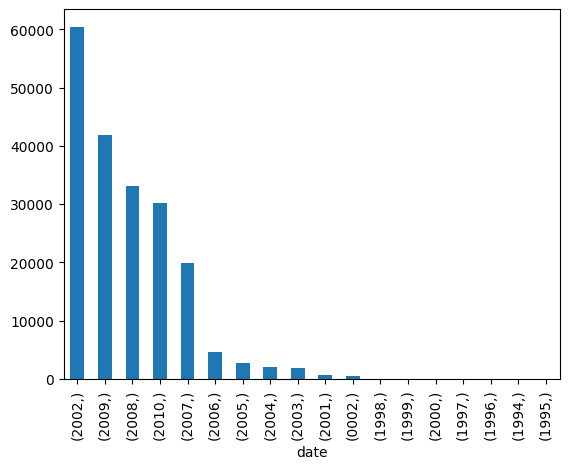

In [15]:
import pandas as pd


def get_year(date):
    return date.split("-")[0]

data = pd.read_csv("./data/deu_mixed-typical_2011_300K-sources.txt", encoding="utf-8", delimiter='\t', header=None, names=["index", "name", "date"])

print(f"# Of entries: {len(data)}")

dates = data["date"]
print(f"Min Date: {dates.min()}")    
print(f"Max Date: {dates.max()}")

data["date"] = data["date"].apply(get_year)


# data_reduced = data[data["date"] > "2010-12"]
prints_per_date = data[["date"]].value_counts().copy()
prints_per_date.plot.bar(x="date", y="count")

# Aufgabe: Cleaning des "Boston Housing"-Datensatzes
Dies ist sozusagen der Veteran unter den Immobiliendatensätzen. Dementsprechend viel Material ist auch dazu zu finden. Aber hier sollen sie natürlich selbst tätig werden...

Laden sie sich den Datensatz herunter. Führen sie die Schritte der Sichtung und des Einlesens durch. Was für Daten enthält der Datensatz?

Nach dem Einlesen soll der Datensatz bereinigt werden, so wie eben gemeinsam durchgeführt. Testen sie ruhig unterschiedliche Varianten aus, es gibt nicht die eine, richtige Lösung.

In [3]:
import pandas as pd


boston_housing = pd.read_csv("./data/HousingData.csv")
num_missing = boston_housing.isna().sum()
num_missing

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

<AxesSubplot: >

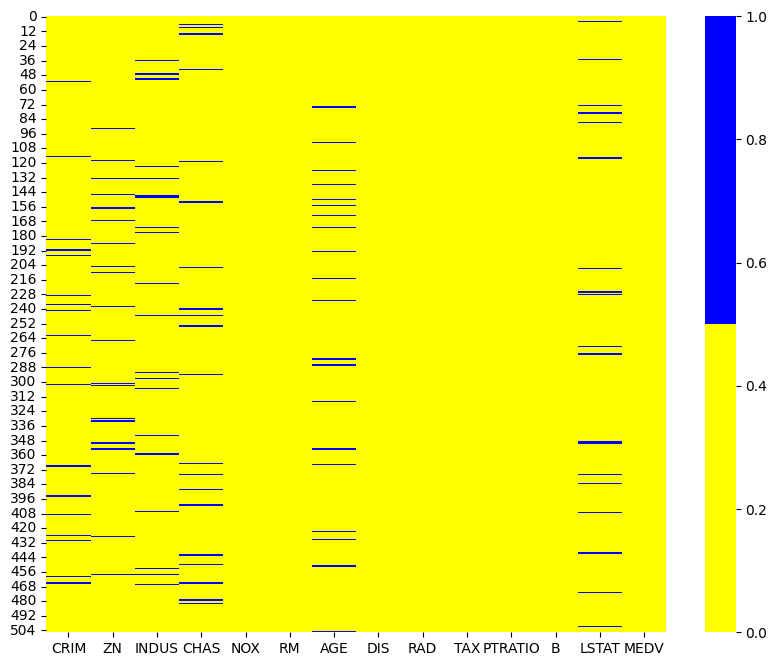

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
cols = boston_housing.columns

colors = ["yellow", "blue"]
sns.heatmap(boston_housing[cols].isna(), cmap=sns.color_palette(colors))

In [6]:
boston_housing.kurt(numeric_only=True)[:10]

CRIM     36.568348
ZN        4.132614
INDUS    -1.217991
CHAS      9.478898
NOX      -0.064667
RM        1.891500
AGE      -0.982140
DIS       0.487941
RAD      -0.867232
TAX      -1.142408
dtype: float64

<AxesSubplot: >

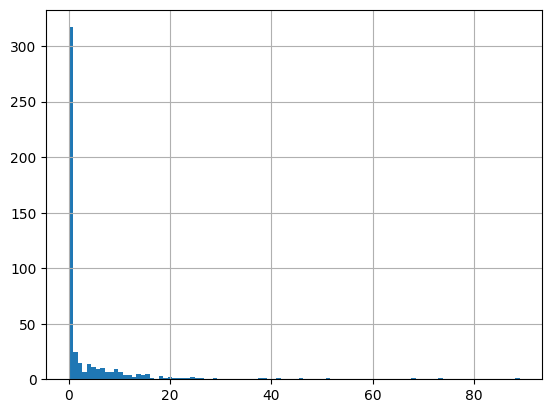

In [7]:
boston_housing['CRIM'].hist(bins=100)

<AxesSubplot: >

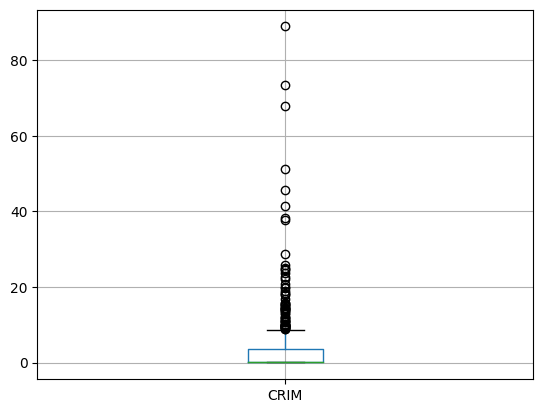

In [8]:
boston_housing.boxplot(column=['CRIM'])

<AxesSubplot: >

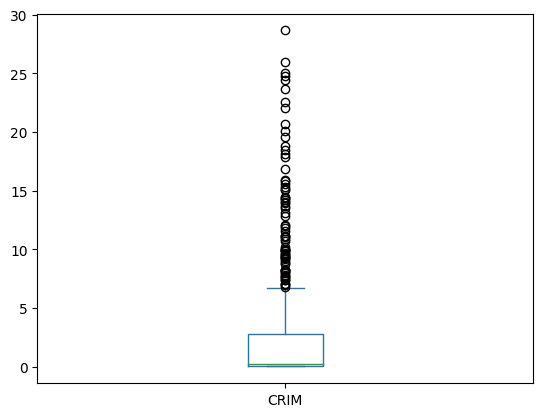

In [10]:
boston_housing.CRIM[boston_housing.CRIM < 30].plot.box()

In [11]:
boston_housing.CRIM.describe()

count    486.000000
mean       3.611874
std        8.720192
min        0.006320
25%        0.081900
50%        0.253715
75%        3.560263
max       88.976200
Name: CRIM, dtype: float64